# Laboratorio 7
### Analisis de Redes sociales
- Daniel Gomez 21429
- Abner Garcia 21285

In [111]:
import json
import pandas as pd
import chardet
import sweetviz as sv

### Inciso 1
Descargue los archivos de datos (traficogt.txt, tioberny.txt)

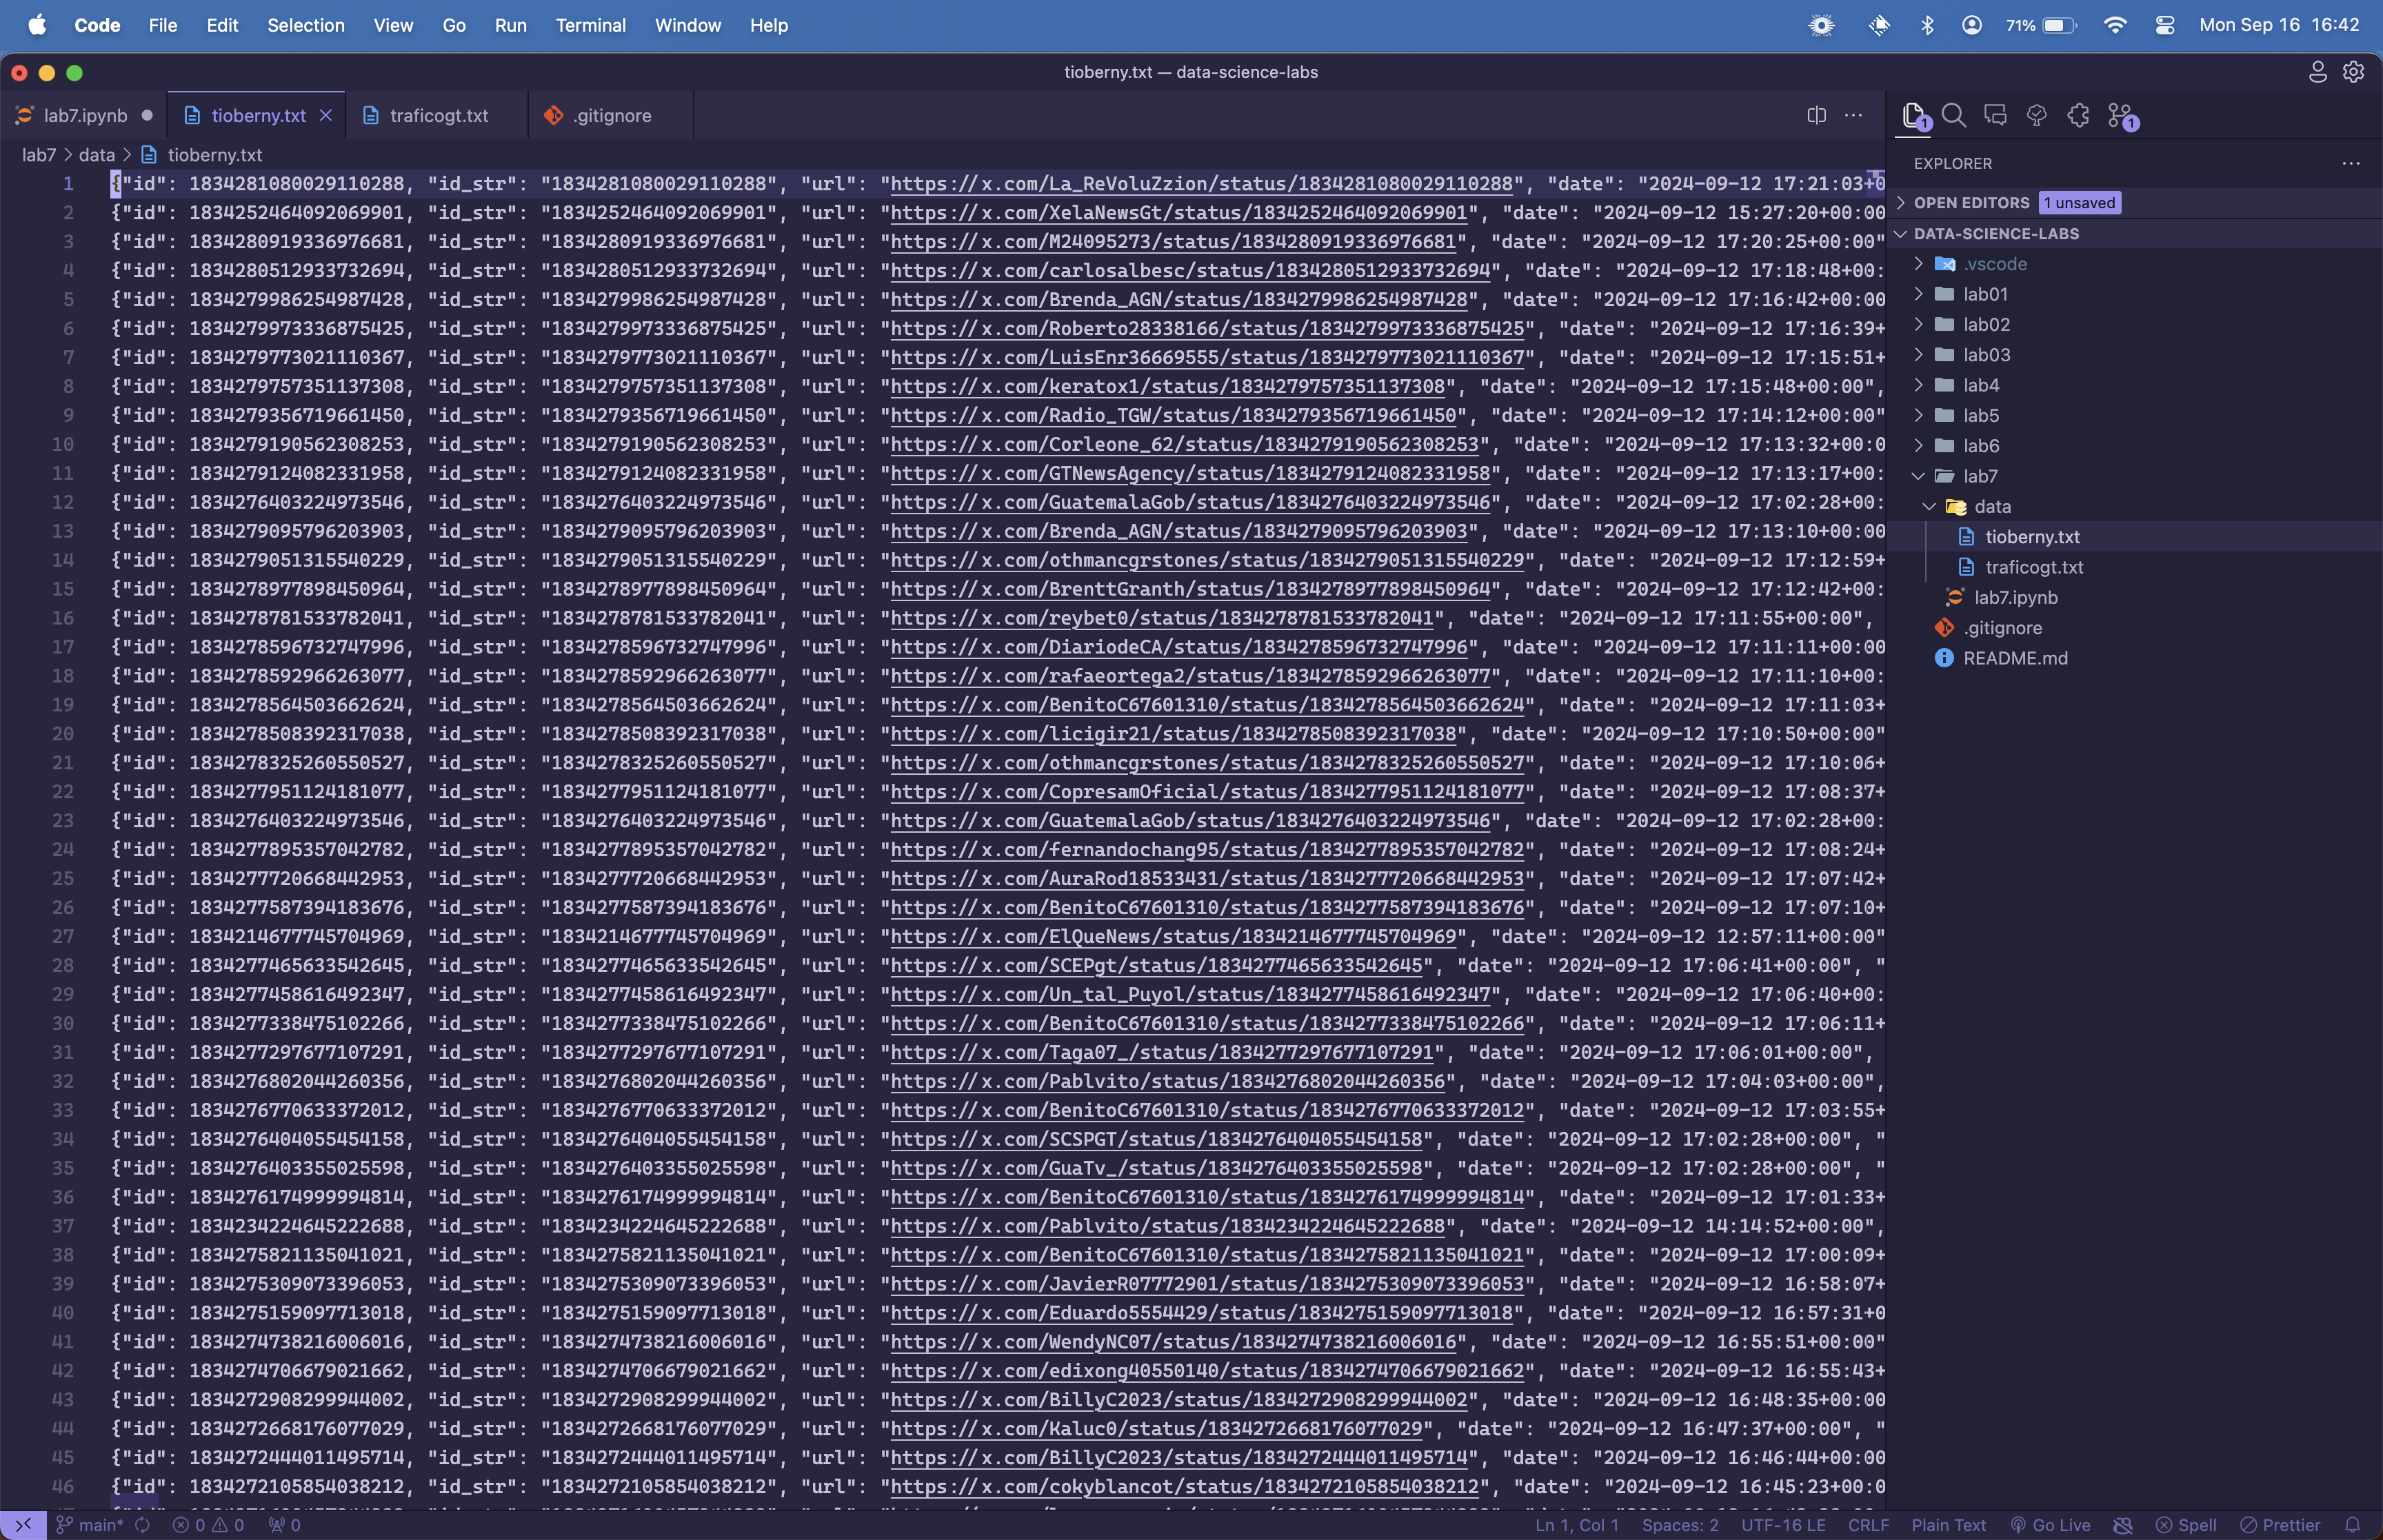

### Inciso 2
Cargue los archivos de datos a R o a Python.

In [93]:
def detect_encoding(file_path):
    with open(file_path, 'rb') as file:
        raw_data = file.read()
    return chardet.detect(raw_data)['encoding']

def parseFile(file_path):
    # Detect the file encoding
    encoding = detect_encoding(file_path)
    print(f"Detected file encoding: {encoding}")

    with open(file_path, 'r', encoding=encoding) as file:
        content = file.read()

    # Find all JSON objects in the content
    json_objects = []
    brace_count = 0
    start_index = -1
    
    for i, char in enumerate(content):
        if char == '{':
            if brace_count == 0:
                start_index = i
            brace_count += 1
        elif char == '}':
            brace_count -= 1
            if brace_count == 0 and start_index != -1:
                json_objects.append(content[start_index:i+1])
                start_index = -1

    # Parse each JSON object
    all_data = []
    for obj in json_objects:
        try:
            parsed = json.loads(obj)
            all_data.append(parsed)
        except json.JSONDecodeError:
            print(f"Error parsing JSON object: {obj[:50]}...")  # Print first 50 chars of problematic object

    # Create a DataFrame
    df = pd.DataFrame(all_data)
    return df

In [94]:
tioBerny = parseFile('data/tioberny.txt')

Detected file encoding: UTF-16


In [95]:
tioBerny.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,"{'id': 1435062946598694914, 'id_str': '1435062...",es,"_\nConfirmado Compañeres,\n\nEl impuesto por l...",0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,"{'id': 956650778634145792, 'id_str': '95665077...",es,#URGENTE Lo que los medios #faferos no informa...,12,80,142,...,None,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,"{'id': 1087057038755143680, 'id_str': '1087057...",es,@IvanDuque @BArevalodeLeon Con que usaste PEGA...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,"{'id': 2881001877, 'id_str': '2881001877', 'ur...",es,@IvanDuque @BArevalodeLeon Entre Ellos se enti...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,"{'id': 3013862206, 'id_str': '3013862206', 'ur...",es,El presidente @BArevalodeLeon y la vicepreside...,0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet


In [96]:
tioBerny.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,bookmarkedCount,conversationId,viewCount,inReplyToTweetId
count,5.019000e+03,5019.000000,5019.000000,5019.000000,5019.000000,5019.00000,5.019000e+03,4.938000e+03,4.276000e+03
mean,1.832892e+18,7.408249,21.775254,109.174935,1.780634,4.95796,1.832341e+18,6.244600e+03,1.832930e+18
std,2.155786e+16,110.363737,279.448721,1869.974212,25.948332,111.26089,2.338536e+16,1.486038e+05,9.878118e+15
min,8.094212e+17,0.000000,0.000000,0.000000,0.000000,0.00000,8.094212e+17,1.000000e+00,1.257873e+18
25%,1.833204e+18,0.000000,0.000000,0.000000,0.000000,0.00000,1.832935e+18,8.000000e+00,1.832965e+18
50%,1.833598e+18,0.000000,0.000000,0.000000,0.000000,0.00000,1.833493e+18,2.500000e+01,1.833493e+18
75%,1.833910e+18,0.000000,0.000000,2.000000,0.000000,0.00000,1.833674e+18,8.800000e+01,1.833659e+18
max,1.834281e+18,4783.000000,8307.000000,67416.000000,1336.000000,5277.00000,1.834281e+18,8.495723e+06,1.834279e+18


In [97]:
traffic = parseFile('data/traficogt.txt')

Detected file encoding: UTF-16


[Summarizing dataframe]                      |          | [  0%]   01:24 -> (? left)
[Summarizing dataframe]                      |          | [  0%]   01:03 -> (? left)
[Summarizing dataframe]                      |          | [  0%]   00:13 -> (? left)
[Summarizing dataframe]                      |          | [  0%]   00:10 -> (? left)


In [98]:
traffic.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834236045598056867,1834236045598056867,https://x.com/traficogt/status/183423604559805...,2024-09-12 14:22:06+00:00,"{'id': 93938886, 'id_str': '93938886', 'url': ...",es,Es comprensible la resolución... El ruso sabe ...,0,0,1,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834029142565658846,1834029142565658846,https://x.com/monymmorales/status/183402914256...,2024-09-12 00:39:56+00:00,"{'id': 976875408, 'id_str': '976875408', 'url'...",es,La corrupción de la @CC_Guatemala\nes descarad...,0,56,84,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",{'title': 'La Corte de Constitucionalidad orde...,snscrape.modules.twitter.Tweet
2,1834039491826180424,1834039491826180424,https://x.com/animaldgalaccia/status/183403949...,2024-09-12 01:21:04+00:00,"{'id': 1730828822029750272, 'id_str': '1730828...",qme,@PNCdeGuatemala @mingobguate @FJimenezmingob @...,0,0,1,...,None,NaN,None,"{'id': 130315077, 'id_str': '130315077', 'user...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1833963729136091179,1833963729136091179,https://x.com/EstacionDobleA/status/1833963729...,2024-09-11 20:20:01+00:00,"{'id': 1802661334355456000, 'id_str': '1802661...",qam,@amilcarmontejo @AztecaNoticiaGT @BancadaSemil...,0,0,0,...,None,1.833964e+18,1833963727575781534,"{'id': 1802661334355456000, 'id_str': '1802661...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1833665391698092330,1833665391698092330,https://x.com/CubReserva/status/18336653916980...,2024-09-11 00:34:31+00:00,"{'id': 1155617398675988481, 'id_str': '1155617...",es,@soy_502 @AztecaNoticiaGT @CONAPgt @DenunciaEM...,0,0,1,...,None,1.833664e+18,1833664431084949711,"{'id': 1155617398675988481, 'id_str': '1155617...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet


In [99]:
traffic.describe()

,id,replyCount,retweetCount,likeCount,quoteCount,bookmarkedCount,conversationId,viewCount,inReplyToTweetId
count,5.604000e+03,5604.000000,5604.000000,5604.000000,5604.000000,5604.000000,5.604000e+03,5.600000e+03,3.991000e+03
mean,1.753794e+18,13.208779,30.137580,86.311563,6.228051,1.664347,1.753121e+18,1.059497e+04,1.751085e+18
std,3.837634e+16,152.680995,159.949164,468.732810,101.484622,15.645979,4.118726e+16,8.991011e+04,4.183331e+16
min,1.601244e+18,0.000000,0.000000,0.000000,0.000000,0.000000,7.892091e+17,1.000000e+00,7.892091e+17
25%,1.714977e+18,0.000000,0.000000,0.000000,0.000000,0.000000,1.714756e+18,3.000000e+01,1.713655e+18
50%,1.746769e+18,0.000000,0.000000,0.000000,0.000000,0.000000,1.746743e+18,7.400000e+01,1.746649e+18
75%,1.782551e+18,0.000000,1.000000,5.000000,0.000000,0.000000,1.781022e+18,9.792500e+02,1.776680e+18
max,1.834236e+18,5965.000000,3415.000000,12920.000000,4705.000000,633.000000,1.834236e+18,3.547506e+06,1.833964e+18


### Inciso 3
Limpie y preprocese los datos. Describa de forma detallada las actividades de preprocesamiento que llevó a cabo.

3.1. Se pueden hacer tareas como:
- Convertir el texto a mayúsculas o a minúsculas
- Quitar los caracteres especiales que aparecen como “#”,”@” o los apóstrofes.
- Quitar las url
- Revisar si hay emoticones y quitarlos, ¿conviene quitarlos para este ejercicio?
- Quitar los signos de puntuación
- Quitar los artículos, preposiciones y conjunciones (stopwords)
- Quitar números si considera que interferirán en los análisis.

In [100]:
# convertir a minusculas
columns = ["rawContent","sourceLabel"]
tioBerny[columns] = tioBerny[columns].apply(lambda x: x.str.lower())
traffic[columns] = traffic[columns].apply(lambda x: x.str.lower())

# quitar caracteres especiales como #, @ y apostrofes
tioBerny[columns] = tioBerny[columns].apply(lambda x: x.str.replace(r"[#@']", "", regex=True))
traffic[columns] = traffic[columns].apply(lambda x: x.str.replace(r"[#@']", "", regex=True))

# quitar las urls de los textos
tioBerny[columns] = tioBerny[columns].apply(lambda x: x.str.replace(r"http\S+", "", regex=True))
traffic[columns] = traffic[columns].apply(lambda x: x.str.replace(r"http\S+", "", regex=True))

# quitar emoticones 
tioBerny[columns] = tioBerny[columns].apply(lambda x: x.str.replace(r"[\U0001F600-\U0001F64F]", "", regex=True))
traffic[columns] = traffic[columns].apply(lambda x: x.str.replace(r"[\U0001F600-\U0001F64F]", "", regex=True))

# quitar signos de puntuacion
tioBerny[columns] = tioBerny[columns].apply(lambda x: x.str.replace(r"[^\w\s]", "", regex=True))
traffic[columns] = traffic[columns].apply(lambda x: x.str.replace(r"[^\w\s]", "", regex=True))

# quitar articulos, preposiciones y conjunciones (stop words)
tioBerny[columns] = tioBerny[columns].apply(lambda x: x.str.replace(r"\b(de|la|el|los|las|un|una|unos|unas|y|o|a|ante|bajo|con|contra|de|desde|en|entre|hacia|hasta|para|por|según|sin|sobre|tras)\b", "", regex=True))
traffic[columns] = traffic[columns].apply(lambda x: x.str.replace(r"\b(de|la|el|los|las|un|una|unos|unas|y|o|a|ante|bajo|con|contra|de|desde|en|entre|hacia|hasta|para|por|según|sin|sobre|tras)\b", "", regex=True))

# quitar numeros que interfieran con el analisis
tioBerny[columns] = tioBerny[columns].apply(lambda x: x.str.replace(r"\b\d+\b", "", regex=True))
traffic[columns] = traffic[columns].apply(lambda x: x.str.replace(r"\b\d+\b", "", regex=True))


3.2. Cada registro de tweet tiene una estructura JSON que incluye metadatos como ID de usuario, texto del tweet, menciones, retweets, y favoritos. Asegúrate de extraer las menciones, respuestas y retweets para identificar las relaciones entre usuarios.

In [101]:
# imprimir los metadatos JSON de la columna mentionedUsers de los primeros 5 registros
# imprimir el json de manera legible
# estos son una lista [] de objetos JSON
for i in range(5):
    mentions = tioBerny['mentionedUsers'][i]
    print(json.dumps(mentions, indent=4))

[
    {
        "id": 23664866,
        "id_str": "23664866",
        "username": "usembassyguate",
        "displayname": "US Embassy Guatemala",
        "_type": "snscrape.modules.twitter.UserRef"
    },
    {
        "id": 1001171061831020545,
        "id_str": "1001171061831020545",
        "username": "48CantonesToto",
        "displayname": "48 Cantones Oficial",
        "_type": "snscrape.modules.twitter.UserRef"
    },
    {
        "id": 262691982,
        "id_str": "262691982",
        "username": "USAIDGuate",
        "displayname": "USAID Guatemala",
        "_type": "snscrape.modules.twitter.UserRef"
    },
    {
        "id": 1362391326,
        "id_str": "1362391326",
        "username": "UEGuatemala",
        "displayname": "Uni\u00f3n Europea en Guatemala",
        "_type": "snscrape.modules.twitter.UserRef"
    },
    {
        "id": 945378369818058752,
        "id_str": "945378369818058752",
        "username": "BArevalodeLeon",
        "displayname": "Bernardo Ar\u0

3.3. Preprocesa los datos eliminando duplicados. Normaliza los nombres de usuario y las menciones para evitar inconsistencias.

In [102]:
# eliminar duplicados de la columna id
tioBerny.drop_duplicates(subset=['id'], inplace=True)

# normalizar el nombre de usuario para evitar inconsistencias
# estos estan dentro de un string JSON de la siguiente formato:
# {'id': 93938886, 'id_str': '93938886', 'url': 'https://x.com/traficogt', 'username': 'traficogt', 'displayname': 'traficoGT', 'rawDescription': 'Noticias de ciudad de Guatemala', 'created': '2009-12-01 20:42:19+00:00', 'followersCount': 314368, 'friendsCount': 137, 'statusesCount': 52385, 'favouritesCount': 3471, 'listedCount': 291, 'mediaCount': 1292, 'location': 'Guatemala', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1782036597841530880/-tVuhOdK_normal.jpg', 'profileBannerUrl': None, 'protected': None, 'verified': False, 'blue': False, 'blueType': None, 'descriptionLinks': [], 'pinnedIds': [], '_type': 'snscrape.modules.twitter.User'}
# sobrescribit el valor de la columna reemplazando el valor de username con el valor normalizado
# extraer el valor de username del string JSON y sobrescribir el valor de la columna
for i in range(len(tioBerny)):
    user_dict = tioBerny.iloc[i]['user']
    if 'username' in user_dict:
        # normalize username
        user_dict['username'] = user_dict['username'].replace(" ", "").lower()
        # Since user_dict is already a dictionary, no need to load it from a string
        tioBerny.at[tioBerny.index[i], 'user'] = json.dumps(user_dict)  # Convert back to string if needed
    

3.4. Crea una estructura de datos eficiente para el análisis de redes (e.g., un DataFrame o una matriz de adyacencia). Asegúrate de representar las interacciones como grafos dirigidos, donde los nodos representan usuarios y las aristas representan las interacciones entre ellos (retweets, menciones, respuestas).

In [103]:
tioBerny.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834281080029110288,1834281080029110288,https://x.com/La_ReVoluZzion/status/1834281080...,2024-09-12 17:21:03+00:00,"{""id"": 1435062946598694914, ""id_str"": ""1435062...",es,_\nconfirmado compañeres\n\n impuesto usemba...,0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834252464092069901,1834252464092069901,https://x.com/XelaNewsGt/status/18342524640920...,2024-09-12 15:27:20+00:00,"{""id"": 956650778634145792, ""id_str"": ""95665077...",es,urgente lo que medios faferos no informaron a...,12,80,142,...,None,NaN,None,None,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,twitter web app,"{'photos': [], 'videos': [{'thumbnailUrl': 'ht...",None,snscrape.modules.twitter.Tweet
2,1834280919336976681,1834280919336976681,https://x.com/M24095273/status/183428091933697...,2024-09-12 17:20:25+00:00,"{""id"": 1087057038755143680, ""id_str"": ""1087057...",es,ivanduque barevalodeleon que usaste pegasus ...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,twitter web app,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1834280512933732694,1834280512933732694,https://x.com/carlosalbesc/status/183428051293...,2024-09-12 17:18:48+00:00,"{""id"": 2881001877, ""id_str"": ""2881001877"", ""ur...",es,ivanduque barevalodeleon ellos se entienden b...,0,0,0,...,None,1.834197e+18,1834197215415599186,"{'id': 77653794, 'id_str': '77653794', 'userna...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1834279986254987428,1834279986254987428,https://x.com/Brenda_AGN/status/18342799862549...,2024-09-12 17:16:42+00:00,"{""id"": 3013862206, ""id_str"": ""3013862206"", ""ur...",es,presidente barevalodeleon vicepresidenta ka...,0,0,0,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,{'photos': [{'url': 'https://pbs.twimg.com/med...,None,snscrape.modules.twitter.Tweet


In [104]:
traffic.head()

,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,likeCount,...,coordinates,inReplyToTweetId,inReplyToTweetIdStr,inReplyToUser,source,sourceUrl,sourceLabel,media,card,_type
0,1834236045598056867,1834236045598056867,https://x.com/traficogt/status/183423604559805...,2024-09-12 14:22:06+00:00,"{'id': 93938886, 'id_str': '93938886', 'url': ...",es,es comprensible resolución ruso sabe engras...,0,0,1,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
1,1834029142565658846,1834029142565658846,https://x.com/monymmorales/status/183402914256...,2024-09-12 00:39:56+00:00,"{'id': 976875408, 'id_str': '976875408', 'url'...",es,corrupción cc_guatemala\nes descarada falsi...,0,56,84,...,None,NaN,None,None,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",{'title': 'La Corte de Constitucionalidad orde...,snscrape.modules.twitter.Tweet
2,1834039491826180424,1834039491826180424,https://x.com/animaldgalaccia/status/183403949...,2024-09-12 01:21:04+00:00,"{'id': 1730828822029750272, 'id_str': '1730828...",qme,pncdeguatemala mingobguate fjimenezmingob dieg...,0,0,1,...,None,NaN,None,"{'id': 130315077, 'id_str': '130315077', 'user...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,twitter for iphone,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
3,1833963729136091179,1833963729136091179,https://x.com/EstacionDobleA/status/1833963729...,2024-09-11 20:20:01+00:00,"{'id': 1802661334355456000, 'id_str': '1802661...",qam,amilcarmontejo aztecanoticiagt bancadasemilla ...,0,0,0,...,None,1.833964e+18,1833963727575781534,"{'id': 1802661334355456000, 'id_str': '1802661...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet
4,1833665391698092330,1833665391698092330,https://x.com/CubReserva/status/18336653916980...,2024-09-11 00:34:31+00:00,"{'id': 1155617398675988481, 'id_str': '1155617...",es,soy_502 aztecanoticiagt conapgt denunciaempagu...,0,0,1,...,None,1.833664e+18,1833664431084949711,"{'id': 1155617398675988481, 'id_str': '1155617...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,twitter for android,"{'photos': [], 'videos': [], 'animated': []}",None,snscrape.modules.twitter.Tweet


### Inciso 4
Haga un análisis exploratorio de los datos para entenderlos mejor, documente todos los análisis. Escriba una serie de insights que se puedan seguir investigando.

In [109]:
# replace array columns into strings separated by commas
# drop colums: hashtags, cashtags, mentionedUsers, links
columns = ["user", "quotedTweet", "inReplyToUser", "card", "place", "hashtags", "cashtags", "mentionedUsers", "links", "media"]

In [112]:
modified_df = tioBerny.drop(columns, axis=1)
report = sv.analyze(modified_df)
report.show_html('analysis/tioBerny.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report analysis/tioBerny.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [113]:
modified_df = traffic.drop(columns, axis=1)
report = sv.analyze(modified_df)
report.show_html('analysis/traffic.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)

Report analysis/traffic.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Inciso 5
##### Análisis de la topología de la red
5.1. Construcción y visualización de grafos: Utiliza herramientas para construir y visualizar grafos dirigidos de las interacciones entre usuarios en la red seleccionada. Muestra claramente los nodos más conectados y las relaciones de poder dentro de las comunidades.

In [ ]:
# codigo de Abner alias AMIGO PROOOO

5.2. Cálculo de métricas de red clave: Calcula las siguientes métricas para la red seleccionada y las discute:
- Densidad de la red: Mide cuántos enlaces existen en relación con el número máximo posible de enlaces.
- Diámetro de la red: Mide la distancia máxima entre dos nodos más distantes.
- Coeficiente de agrupamiento: Indica el grado en que los nodos tienden a formar clústeres o grupos dentro de la red.

In [ ]:
# codigo de amigo pro, Abner